In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0  
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Layer normalization and multi-head attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Layer normalization and feed-forward network
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(inputs.shape[-1])(x)
    return x + res

input_layer = layers.Input(shape=(28, 28))

In [4]:
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=256, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=256, dropout=0.2)

# Pooling and final output
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 148s 155ms/step - loss: 0.9296 - accuracy: 0.6785 - val_loss: 0.6208 - val_accuracy: 0.7987
Epoch 2/10
938/938 [==============================] - 146s 156ms/step - loss: 0.5606 - accuracy: 0.8116 - val_loss: 0.4879 - val_accuracy: 0.8315
Epoch 3/10
938/938 [==============================] - 526s 561ms/step - loss: 0.4890 - accuracy: 0.8371 - val_loss: 0.4594 - val_accuracy: 0.8466
Epoch 4/10
938/938 [==============================] - 1890s 2s/step - loss: 0.4396 - accuracy: 0.8542 - val_loss: 0.4619 - val_accuracy: 0.8510
Epoch 5/10
938/938 [==============================] - 148s 158ms/step - loss: 0.4124 - accuracy: 0.8645 - val_loss: 0.3738 - val_accuracy: 0.8772
Epoch 6/10
938/938 [==============================] - 145s 155ms/step - loss: 0.3888 - accuracy: 0.8707 - val_loss: 0.3799 - val_accuracy: 0.8738
Epoch 7/10
938/938 [==============================] - 1134s 1s/step - loss: 0.3745 - accuracy: 0.8758 - val_loss: 0.3423 - val

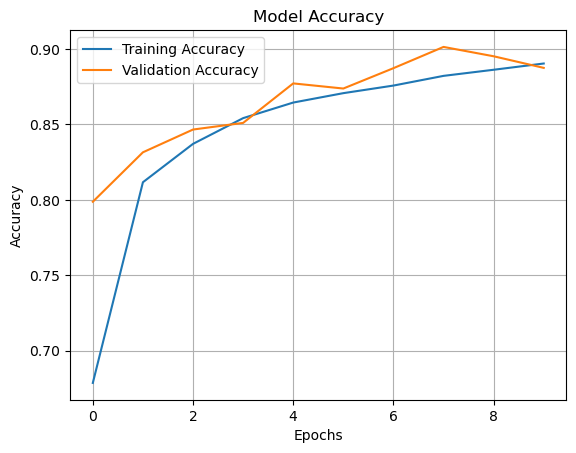

In [6]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_accuracy(history)

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Transformer Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 11s 34ms/step - loss: 0.3412 - accuracy: 0.8875
Transformer Test accuracy: 0.8875
